In [1]:
import pandas as pd

In [2]:
acc_df = pd.read_csv('ACC.txt', header=None)
acc_df.head()

,0,1,2,3,4,5,6,7,8
0,ACC,20200401,09:08,964.80,964.80,964.80,964.80,456,0
1,ACC,20200401,09:16,964.80,964.80,951.25,956.20,4587,0
2,ACC,20200401,09:17,956.20,957.25,953.10,955.15,4555,0
3,ACC,20200401,09:18,954.95,959.00,954.95,958.55,5121,0
4,ACC,20200401,09:19,958.50,960.00,956.50,959.20,3944,0


In [3]:
acc_df.columns = ['scrip', 'date', 'time',\
                  'open', 'high', 'low', \
                  'close', 'vol', 'OI']

In [36]:
acc_df['timestamp'] = pd.to_datetime(acc_df['date'].astype('str')+" "+ acc_df['time'], format='%Y%m%d %H:%M')

In [41]:
cp_acc_df = acc_df.set_index('timestamp')

In [42]:
cp_acc_df

,scrip,date,time,open,high,low,close,vol,OI
timestamp,,,,,,,,,
2020-04-01 09:08:00,ACC,20200401,09:08,964.80,964.80,964.80,964.80,456,0
2020-04-01 09:16:00,ACC,20200401,09:16,964.80,964.80,951.25,956.20,4587,0
2020-04-01 09:17:00,ACC,20200401,09:17,956.20,957.25,953.10,955.15,4555,0
2020-04-01 09:18:00,ACC,20200401,09:18,954.95,959.00,954.95,958.55,5121,0
2020-04-01 09:19:00,ACC,20200401,09:19,958.50,960.00,956.50,959.20,3944,0
...,...,...,...,...,...,...,...,...,...
2020-04-30 15:29:00,ACC,20200430,15:29,1174.80,1174.80,1169.30,1170.00,4588,0
2020-04-30 15:30:00,ACC,20200430,15:30,1169.90,1172.05,1168.60,1170.10,1001,0
2020-04-30 15:33:00,ACC,20200430,15:33,1179.10,1179.10,1179.10,1179.10,0,0


In [53]:
cp_acc_df.to_csv('cp.csv', header=None)

In [5]:
import backtrader as bt
cerebro = bt.Cerebro()
cerebro.broker.setcash(100000.0)
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00


In [45]:
from backtrader import feed

In [46]:
class PandasData(feed.DataBase):
    '''
    The ``dataname`` parameter inherited from ``feed.DataBase`` is the pandas
    DataFrame
    '''

    params = (
        # Possible values for datetime (must always be present)
        #  None : datetime is the "index" in the Pandas Dataframe
        #  -1 : autodetect position or case-wise equal name
        #  >= 0 : numeric index to the colum in the pandas dataframe
        #  string : column name (as index) in the pandas dataframe
        ('datetime', None),

        # Possible values below:
        #  None : column not present
        #  -1 : autodetect position or case-wise equal name
        #  >= 0 : numeric index to the colum in the pandas dataframe
        #  string : column name (as index) in the pandas dataframe
        ('open', 3),
        ('high', 4),
        ('low', 5),
        ('close', 6),
        ('volume', 7),
        ('openinterest', 8),
    )

<IPython.core.display.Javascript object>


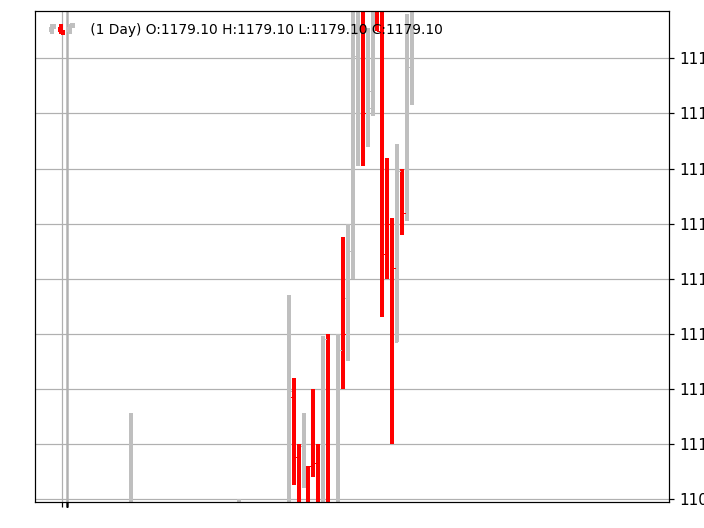

[[<Figure size 640x480 with 1 Axes>]]

In [52]:
# Create a cerebro entity
cerebro = bt.Cerebro(stdstats=False)

# Add a strategy
cerebro.addstrategy(bt.Strategy)

# Get a pandas dataframe
datapath = ('ACC.txt')

# Pass it to the backtrader datafeed and add it to the cerebro
data = bt.feeds.PandasData(dataname=cp_acc_df)

cerebro.adddata(data)

# Run over everything
cerebro.run()

# Plot the result
cerebro.plot(volume=False)



In [63]:
data = bt.feeds.GenericCSVData(
dataname='cp.csv',
datetime=0,
fromdate=datetime.datetime(2020, 4, 1),
timeframe=bt.TimeFrame.Minutes,
dtformat=('%d-%m-%Y %H:%M:%S'),
open=4,
high=5,
low=6,
close=7,
volume=8,
openinterest=-1,
)

In [66]:
data[0]

IndexError: array index out of range

In [65]:
data.close[0]

IndexError: array index out of range

GenericCSVData
This class exposes a generic interface allowing parsing mostly every CSV file format out there.

Parses a CSV file according to the order and field presence defined by the parameters

Specific parameters (or specific meaning):

dataname

The filename to parse or a file-like object

datetime (default: 0) column containing the date (or datetime) field

time (default: -1) column containing the time field if separate from the datetime field (-1 indicates it’s not present)

open (default: 1) , high (default: 2), low (default: 3), close (default: 4), volume (default: 5), openinterest (default: 6)

Index of the columns containing the corresponding fields

If a negative value is passed (example: -1) it indicates the field is not present in the CSV data

nullvalue (default: float(‘NaN’))

Value that will be used if a value which should be there is missing (the CSV field is empty)

dtformat (default: %Y-%m-%d %H:%M:%S)

Format used to parse the datetime CSV field

tmformat (default: %H:%M:%S)

Format used to parse the time CSV field if “present” (the default for the “time” CSV field is not to be present)

An example usage covering the following requirements:

Limit input to year 2000

HLOC order rather than OHLC

Missing values to be replaced with zero (0.0)

Daily bars are provided and datetime is just the day with format YYYY-MM-DD

No openinterest column is present

The code:

In [71]:
data1 = bt.feeds.GenericCSVData(
    dataname='cp.csv',
    
    nullvalue=0.0,
    open=4,
    high=5,
    low=6,
    close=7,
    volume=8,
    openinterest=-1,
)

In [87]:


# Create a Stratey
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders
        self.order = None

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED, %.2f' % order.executed.price)
            elif order.issell():
                self.log('SELL EXECUTED, %.2f' % order.executed.price)

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] < self.dataclose[-1]:
                    # current close less than previous close

                    if self.dataclose[-1] < self.dataclose[-2]:
                        # previous close less than the previous close

                        # BUY, BUY, BUY!!! (with default parameters)
                        self.log('BUY CREATE, %.2f' % self.dataclose[0])

                        # Keep track of the created order to avoid a 2nd order
                        self.order = self.buy()

        else:

            # Already in the market ... we might sell
            if len(self) >= (self.bar_executed + 5):
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()

                
if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
  # Add the Data Feed to Cerebro
    cerebro.adddata(data1)


    # Set our desired cash start
    cerebro.broker.setcash(100000.0)
    cerebro.broker.setcommission(commission=0.0003)
    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())


Starting Portfolio Value: 100000.00
2020-04-01, Close, 958.55
2020-04-01, Close, 959.20
2020-04-01, Close, 959.35
2020-04-01, Close, 956.15
2020-04-01, Close, 954.65
2020-04-01, BUY CREATE, 954.65
2020-04-01, Close, 955.05
2020-04-01, Close, 955.55
2020-04-01, Close, 955.55
2020-04-01, Close, 951.30
2020-04-01, Close, 953.05
2020-04-01, Close, 956.70
2020-04-01, Close, 956.65
2020-04-01, Close, 955.40
2020-04-01, Close, 955.25
2020-04-01, Close, 955.45
2020-04-01, Close, 957.50
2020-04-01, Close, 958.75
2020-04-01, Close, 958.80
2020-04-01, Close, 958.15
2020-04-01, Close, 957.95
2020-04-01, Close, 956.85
2020-04-01, Close, 959.30
2020-04-01, Close, 959.00
2020-04-01, Close, 958.35
2020-04-01, Close, 955.80
2020-04-01, Close, 954.15
2020-04-01, Close, 955.00
2020-04-01, Close, 951.90
2020-04-01, Close, 952.00
2020-04-01, Close, 950.65
2020-04-01, Close, 948.40
2020-04-01, Close, 949.40
2020-04-01, Close, 951.50
2020-04-01, Close, 953.70
2020-04-01, Close, 952.00
2020-04-01, Close, 952.

2020-04-03, Close, 964.15
2020-04-03, Close, 963.45
2020-04-03, Close, 962.15
2020-04-03, Close, 963.95
2020-04-03, Close, 963.90
2020-04-03, Close, 962.75
2020-04-03, Close, 962.00
2020-04-03, Close, 962.50
2020-04-03, Close, 963.50
2020-04-03, Close, 962.95
2020-04-03, Close, 963.00
2020-04-03, Close, 962.15
2020-04-03, Close, 960.90
2020-04-03, Close, 963.25
2020-04-03, Close, 963.75
2020-04-03, Close, 963.70
2020-04-03, Close, 963.10
2020-04-03, Close, 963.45
2020-04-03, Close, 964.50
2020-04-03, Close, 964.15
2020-04-03, Close, 964.90
2020-04-03, Close, 963.70
2020-04-03, Close, 961.00
2020-04-03, Close, 961.20
2020-04-03, Close, 962.40
2020-04-03, Close, 961.90
2020-04-03, Close, 963.00
2020-04-03, Close, 963.20
2020-04-03, Close, 961.45
2020-04-03, Close, 962.80
2020-04-03, Close, 961.85
2020-04-03, Close, 962.50
2020-04-03, Close, 961.90
2020-04-03, Close, 961.65
2020-04-03, Close, 962.40
2020-04-03, Close, 959.45
2020-04-03, Close, 959.20
2020-04-03, Close, 956.65
2020-04-03, 

2020-04-07, Close, 994.75
2020-04-07, Close, 991.70
2020-04-07, Close, 993.50
2020-04-07, Close, 993.50
2020-04-07, Close, 993.50
2020-04-07, Close, 994.00
2020-04-07, Close, 994.00
2020-04-07, Close, 994.70
2020-04-07, Close, 994.30
2020-04-07, Close, 993.90
2020-04-07, Close, 993.30
2020-04-07, Close, 991.35
2020-04-07, Close, 990.50
2020-04-07, Close, 991.30
2020-04-07, Close, 991.05
2020-04-07, Close, 990.60
2020-04-07, Close, 990.50
2020-04-07, Close, 989.30
2020-04-07, Close, 988.45
2020-04-07, Close, 988.80
2020-04-07, Close, 989.10
2020-04-07, Close, 990.05
2020-04-07, Close, 990.25
2020-04-07, Close, 989.50
2020-04-07, Close, 989.00
2020-04-07, Close, 989.20
2020-04-07, Close, 990.40
2020-04-07, Close, 992.55
2020-04-07, Close, 993.40
2020-04-07, Close, 993.75
2020-04-07, Close, 993.85
2020-04-07, Close, 994.50
2020-04-07, Close, 993.70
2020-04-07, Close, 993.40
2020-04-07, Close, 992.60
2020-04-07, Close, 991.00
2020-04-07, Close, 993.55
2020-04-07, Close, 993.35
2020-04-07, 

2020-04-08, Close, 954.70
2020-04-08, Close, 950.90
2020-04-08, Close, 949.95
2020-04-08, Close, 952.00
2020-04-08, Close, 954.75
2020-04-08, Close, 957.90
2020-04-08, Close, 959.00
2020-04-08, Close, 958.95
2020-04-08, Close, 960.10
2020-04-08, Close, 959.55
2020-04-08, Close, 961.50
2020-04-08, Close, 960.90
2020-04-08, Close, 959.35
2020-04-08, Close, 960.05
2020-04-08, Close, 960.45
2020-04-08, Close, 959.70
2020-04-08, Close, 958.70
2020-04-08, Close, 958.20
2020-04-08, Close, 957.30
2020-04-08, Close, 956.75
2020-04-08, Close, 956.10
2020-04-08, Close, 956.40
2020-04-08, Close, 956.10
2020-04-08, Close, 954.55
2020-04-08, Close, 950.00
2020-04-08, Close, 950.00
2020-04-08, Close, 948.20
2020-04-08, Close, 950.15
2020-04-08, Close, 949.90
2020-04-08, Close, 951.40
2020-04-08, Close, 950.70
2020-04-08, Close, 951.00
2020-04-08, Close, 947.40
2020-04-08, Close, 945.90
2020-04-08, Close, 944.90
2020-04-08, Close, 944.60
2020-04-08, Close, 943.35
2020-04-08, Close, 943.00
2020-04-08, 

2020-04-09, Close, 1010.00
2020-04-09, Close, 1010.00
2020-04-09, Close, 1010.55
2020-04-09, Close, 1011.25
2020-04-09, Close, 1010.35
2020-04-09, Close, 1009.50
2020-04-09, Close, 1010.35
2020-04-09, Close, 1009.75
2020-04-09, Close, 1009.45
2020-04-09, Close, 1008.50
2020-04-09, Close, 1008.90
2020-04-09, Close, 1009.90
2020-04-09, Close, 1010.50
2020-04-09, Close, 1010.20
2020-04-09, Close, 1009.35
2020-04-09, Close, 1010.00
2020-04-09, Close, 1010.00
2020-04-09, Close, 1007.45
2020-04-09, Close, 1009.00
2020-04-09, Close, 1004.15
2020-04-09, Close, 1003.80
2020-04-09, Close, 997.85
2020-04-09, Close, 996.00
2020-04-09, Close, 997.20
2020-04-09, Close, 1000.00
2020-04-09, Close, 996.70
2020-04-09, Close, 994.75
2020-04-09, Close, 995.00
2020-04-09, Close, 997.50
2020-04-09, Close, 999.00
2020-04-09, Close, 998.60
2020-04-09, Close, 998.95
2020-04-09, Close, 998.60
2020-04-09, Close, 999.00
2020-04-09, Close, 1000.60
2020-04-09, Close, 1001.20
2020-04-09, Close, 1000.70
2020-04-09, C

2020-04-15, Close, 1097.45
2020-04-15, Close, 1096.40
2020-04-15, Close, 1095.55
2020-04-15, Close, 1092.05
2020-04-15, Close, 1094.50
2020-04-15, Close, 1093.85
2020-04-15, Close, 1101.20
2020-04-15, Close, 1102.90
2020-04-15, Close, 1101.75
2020-04-15, Close, 1105.50
2020-04-15, Close, 1105.90
2020-04-15, Close, 1105.90
2020-04-15, Close, 1104.00
2020-04-15, Close, 1105.95
2020-04-15, Close, 1106.00
2020-04-15, Close, 1107.05
2020-04-15, Close, 1106.00
2020-04-15, Close, 1103.00
2020-04-15, Close, 1104.20
2020-04-15, Close, 1107.70
2020-04-15, Close, 1110.95
2020-04-15, Close, 1109.75
2020-04-15, Close, 1108.75
2020-04-15, Close, 1110.00
2020-04-15, Close, 1109.60
2020-04-15, Close, 1109.65
2020-04-15, Close, 1108.60
2020-04-15, Close, 1111.90
2020-04-15, Close, 1105.00
2020-04-15, Close, 1107.30
2020-04-15, Close, 1111.70
2020-04-15, Close, 1112.00
2020-04-15, Close, 1113.50
2020-04-15, Close, 1117.45
2020-04-15, Close, 1117.95
2020-04-15, Close, 1116.00
2020-04-15, Close, 1116.40
2

2020-04-16, Close, 1133.05
2020-04-16, Close, 1131.85
2020-04-16, Close, 1132.15
2020-04-16, Close, 1139.25
2020-04-16, Close, 1144.80
2020-04-16, Close, 1152.00
2020-04-16, Close, 1146.40
2020-04-16, Close, 1149.50
2020-04-16, Close, 1149.60
2020-04-16, Close, 1155.20
2020-04-16, Close, 1160.70
2020-04-16, Close, 1164.00
2020-04-16, Close, 1161.00
2020-04-16, Close, 1157.15
2020-04-16, Close, 1153.55
2020-04-16, Close, 1153.20
2020-04-16, Close, 1147.00
2020-04-16, Close, 1152.15
2020-04-16, Close, 1157.25
2020-04-16, Close, 1156.15
2020-04-16, Close, 1154.35
2020-04-16, Close, 1149.60
2020-04-16, Close, 1155.15
2020-04-16, Close, 1154.00
2020-04-16, Close, 1149.25
2020-04-16, Close, 1147.00
2020-04-16, Close, 1147.15
2020-04-16, Close, 1152.35
2020-04-16, Close, 1151.00
2020-04-16, Close, 1149.45
2020-04-16, Close, 1152.00
2020-04-16, Close, 1153.15
2020-04-16, Close, 1148.25
2020-04-16, Close, 1150.15
2020-04-16, Close, 1152.00
2020-04-16, Close, 1152.90
2020-04-16, Close, 1148.70
2

2020-04-17, Close, 1167.40
2020-04-17, Close, 1166.30
2020-04-17, Close, 1166.00
2020-04-17, Close, 1168.60
2020-04-17, Close, 1167.00
2020-04-17, Close, 1163.35
2020-04-17, Close, 1161.70
2020-04-17, Close, 1155.25
2020-04-17, Close, 1156.05
2020-04-17, Close, 1156.30
2020-04-17, Close, 1152.00
2020-04-17, Close, 1154.00
2020-04-17, Close, 1155.05
2020-04-17, Close, 1152.95
2020-04-17, Close, 1155.00
2020-04-17, Close, 1153.95
2020-04-17, Close, 1154.30
2020-04-17, Close, 1156.40
2020-04-17, Close, 1155.95
2020-04-17, Close, 1152.20
2020-04-17, Close, 1151.40
2020-04-17, Close, 1150.90
2020-04-17, Close, 1153.15
2020-04-17, Close, 1154.35
2020-04-17, Close, 1154.00
2020-04-17, Close, 1154.95
2020-04-17, Close, 1154.00
2020-04-17, Close, 1150.70
2020-04-17, Close, 1153.10
2020-04-17, Close, 1153.25
2020-04-17, Close, 1154.55
2020-04-17, Close, 1153.10
2020-04-17, Close, 1154.30
2020-04-17, Close, 1155.80
2020-04-17, Close, 1160.20
2020-04-17, Close, 1158.00
2020-04-17, Close, 1161.05
2

2020-04-20, Close, 1195.00
2020-04-20, Close, 1195.60
2020-04-20, Close, 1195.05
2020-04-20, Close, 1195.00
2020-04-20, Close, 1195.00
2020-04-20, Close, 1195.00
2020-04-20, Close, 1194.55
2020-04-20, Close, 1195.00
2020-04-20, Close, 1194.60
2020-04-20, Close, 1194.00
2020-04-20, Close, 1195.00
2020-04-20, Close, 1195.15
2020-04-20, Close, 1195.70
2020-04-20, Close, 1195.30
2020-04-20, Close, 1195.25
2020-04-20, Close, 1195.40
2020-04-20, Close, 1195.05
2020-04-20, Close, 1194.95
2020-04-20, Close, 1194.95
2020-04-20, Close, 1195.20
2020-04-20, Close, 1193.25
2020-04-20, Close, 1194.70
2020-04-20, Close, 1195.00
2020-04-20, Close, 1194.75
2020-04-20, Close, 1194.55
2020-04-20, Close, 1194.05
2020-04-20, Close, 1193.80
2020-04-20, Close, 1194.90
2020-04-20, Close, 1195.00
2020-04-20, Close, 1194.50
2020-04-20, Close, 1193.15
2020-04-20, Close, 1194.20
2020-04-20, Close, 1194.80
2020-04-20, Close, 1193.15
2020-04-20, Close, 1194.00
2020-04-20, Close, 1194.45
2020-04-20, Close, 1196.00
2

2020-04-21, Close, 1137.20
2020-04-21, Close, 1137.95
2020-04-21, Close, 1138.40
2020-04-21, Close, 1138.80
2020-04-21, Close, 1137.20
2020-04-21, Close, 1138.50
2020-04-21, Close, 1137.40
2020-04-21, Close, 1137.70
2020-04-21, Close, 1137.25
2020-04-21, Close, 1139.10
2020-04-21, Close, 1138.90
2020-04-21, Close, 1138.85
2020-04-21, Close, 1137.50
2020-04-21, Close, 1137.40
2020-04-21, Close, 1138.75
2020-04-21, Close, 1137.00
2020-04-21, Close, 1136.25
2020-04-21, Close, 1133.45
2020-04-21, Close, 1134.70
2020-04-21, Close, 1134.65
2020-04-21, Close, 1137.15
2020-04-21, Close, 1135.80
2020-04-21, Close, 1136.95
2020-04-21, Close, 1135.05
2020-04-21, Close, 1137.35
2020-04-21, Close, 1136.55
2020-04-21, Close, 1137.80
2020-04-21, Close, 1136.75
2020-04-21, Close, 1137.15
2020-04-21, Close, 1137.40
2020-04-21, Close, 1136.50
2020-04-21, Close, 1136.75
2020-04-21, Close, 1137.00
2020-04-21, Close, 1138.00
2020-04-21, Close, 1135.55
2020-04-21, Close, 1136.75
2020-04-21, Close, 1136.75
2

2020-04-23, Close, 1220.05
2020-04-23, Close, 1220.00
2020-04-23, Close, 1219.90
2020-04-23, Close, 1220.00
2020-04-23, Close, 1219.00
2020-04-23, Close, 1219.45
2020-04-23, Close, 1219.70
2020-04-23, Close, 1219.10
2020-04-23, Close, 1219.00
2020-04-23, Close, 1219.60
2020-04-23, Close, 1219.25
2020-04-23, Close, 1219.10
2020-04-23, Close, 1218.15
2020-04-23, Close, 1217.85
2020-04-23, Close, 1217.00
2020-04-23, Close, 1217.95
2020-04-23, Close, 1218.85
2020-04-23, Close, 1218.55
2020-04-23, Close, 1218.30
2020-04-23, Close, 1217.00
2020-04-23, Close, 1213.90
2020-04-23, Close, 1214.20
2020-04-23, Close, 1215.95
2020-04-23, Close, 1215.00
2020-04-23, Close, 1213.80
2020-04-23, Close, 1213.05
2020-04-23, Close, 1213.05
2020-04-23, Close, 1212.45
2020-04-23, Close, 1210.90
2020-04-23, Close, 1206.00
2020-04-23, Close, 1209.90
2020-04-23, Close, 1216.15
2020-04-23, Close, 1214.10
2020-04-23, Close, 1213.00
2020-04-23, Close, 1212.90
2020-04-23, Close, 1211.10
2020-04-23, Close, 1211.50
2

2020-04-24, Close, 1164.95
2020-04-24, Close, 1165.25
2020-04-24, Close, 1164.45
2020-04-24, Close, 1165.95
2020-04-24, Close, 1165.55
2020-04-24, Close, 1164.60
2020-04-24, Close, 1163.60
2020-04-24, Close, 1164.50
2020-04-24, Close, 1165.10
2020-04-24, Close, 1164.85
2020-04-24, Close, 1165.00
2020-04-24, Close, 1164.80
2020-04-24, Close, 1164.80
2020-04-24, Close, 1163.70
2020-04-24, Close, 1164.55
2020-04-24, Close, 1164.65
2020-04-24, Close, 1164.90
2020-04-24, Close, 1164.90
2020-04-24, Close, 1165.00
2020-04-24, Close, 1166.00
2020-04-24, Close, 1165.70
2020-04-24, Close, 1166.30
2020-04-24, Close, 1165.50
2020-04-24, Close, 1164.35
2020-04-24, Close, 1163.25
2020-04-24, Close, 1164.40
2020-04-24, Close, 1163.80
2020-04-24, Close, 1163.65
2020-04-24, Close, 1164.00
2020-04-24, Close, 1164.45
2020-04-24, Close, 1164.75
2020-04-24, Close, 1165.10
2020-04-24, Close, 1165.80
2020-04-24, Close, 1165.00
2020-04-24, Close, 1165.50
2020-04-24, Close, 1166.45
2020-04-24, Close, 1165.75
2

2020-04-27, Close, 1163.20
2020-04-27, Close, 1163.00
2020-04-27, Close, 1160.05
2020-04-27, Close, 1160.95
2020-04-27, Close, 1161.00
2020-04-27, Close, 1161.05
2020-04-27, Close, 1160.70
2020-04-27, Close, 1158.20
2020-04-27, Close, 1157.80
2020-04-27, Close, 1160.00
2020-04-27, Close, 1159.75
2020-04-27, Close, 1158.85
2020-04-27, Close, 1158.50
2020-04-27, Close, 1159.40
2020-04-27, Close, 1159.90
2020-04-27, Close, 1159.45
2020-04-27, Close, 1159.40
2020-04-27, Close, 1158.00
2020-04-27, Close, 1156.00
2020-04-27, Close, 1153.00
2020-04-27, Close, 1153.15
2020-04-27, Close, 1153.20
2020-04-27, Close, 1153.50
2020-04-27, Close, 1149.90
2020-04-27, Close, 1148.10
2020-04-27, Close, 1149.80
2020-04-27, Close, 1149.10
2020-04-27, Close, 1148.50
2020-04-27, Close, 1149.00
2020-04-27, Close, 1149.45
2020-04-27, Close, 1148.25
2020-04-27, Close, 1145.90
2020-04-27, Close, 1145.70
2020-04-27, Close, 1147.60
2020-04-27, Close, 1150.25
2020-04-27, Close, 1148.35
2020-04-27, Close, 1148.30
2

2020-04-28, Close, 1147.40
2020-04-28, Close, 1145.95
2020-04-28, Close, 1145.20
2020-04-28, Close, 1144.60
2020-04-28, Close, 1146.00
2020-04-28, Close, 1145.90
2020-04-28, Close, 1147.70
2020-04-28, Close, 1147.10
2020-04-28, Close, 1147.25
2020-04-28, Close, 1146.80
2020-04-28, Close, 1147.00
2020-04-28, Close, 1147.15
2020-04-28, Close, 1147.20
2020-04-28, Close, 1148.70
2020-04-28, Close, 1148.85
2020-04-28, Close, 1148.80
2020-04-28, Close, 1148.00
2020-04-28, Close, 1147.15
2020-04-28, Close, 1147.25
2020-04-28, Close, 1147.40
2020-04-28, Close, 1147.80
2020-04-28, Close, 1148.10
2020-04-28, Close, 1147.40
2020-04-28, Close, 1148.05
2020-04-28, Close, 1147.45
2020-04-28, Close, 1147.20
2020-04-28, Close, 1147.25
2020-04-28, Close, 1147.50
2020-04-28, Close, 1148.20
2020-04-28, Close, 1148.00
2020-04-28, Close, 1150.00
2020-04-28, Close, 1148.30
2020-04-28, Close, 1151.50
2020-04-28, Close, 1150.00
2020-04-28, Close, 1147.10
2020-04-28, Close, 1136.50
2020-04-28, Close, 1138.75
2

2020-04-29, Close, 1120.55
2020-04-29, Close, 1120.05
2020-04-29, Close, 1123.80
2020-04-29, Close, 1124.45
2020-04-29, Close, 1124.00
2020-04-29, Close, 1122.60
2020-04-29, Close, 1121.45
2020-04-29, Close, 1120.30
2020-04-29, Close, 1121.70
2020-04-29, Close, 1121.05
2020-04-29, Close, 1120.50
2020-04-29, Close, 1120.75
2020-04-29, Close, 1121.10
2020-04-29, Close, 1120.35
2020-04-29, Close, 1121.00
2020-04-29, Close, 1120.40
2020-04-29, Close, 1120.00
2020-04-29, Close, 1120.00
2020-04-29, Close, 1120.10
2020-04-29, Close, 1120.80
2020-04-29, Close, 1120.00
2020-04-29, Close, 1120.00
2020-04-29, Close, 1120.05
2020-04-29, Close, 1120.30
2020-04-29, Close, 1121.35
2020-04-29, Close, 1121.25
2020-04-29, Close, 1120.95
2020-04-29, Close, 1120.05
2020-04-29, Close, 1120.00
2020-04-29, Close, 1120.10
2020-04-29, Close, 1120.15
2020-04-29, Close, 1120.00
2020-04-29, Close, 1120.95
2020-04-29, Close, 1121.00
2020-04-29, Close, 1121.15
2020-04-29, Close, 1120.85
2020-04-29, Close, 1121.25
2

2020-04-30, Close, 1178.20
2020-04-30, Close, 1180.00
2020-04-30, Close, 1181.60
2020-04-30, Close, 1182.25
2020-04-30, Close, 1183.85
2020-04-30, Close, 1182.40
2020-04-30, Close, 1182.50
2020-04-30, Close, 1184.15
2020-04-30, Close, 1183.65
2020-04-30, Close, 1183.30
2020-04-30, Close, 1183.95
2020-04-30, Close, 1183.75
2020-04-30, Close, 1183.10
2020-04-30, Close, 1179.55
2020-04-30, Close, 1179.60
2020-04-30, Close, 1179.60
2020-04-30, Close, 1179.50
2020-04-30, Close, 1179.20
2020-04-30, Close, 1176.90
2020-04-30, Close, 1177.00
2020-04-30, Close, 1175.90
2020-04-30, Close, 1175.00
2020-04-30, Close, 1169.45
2020-04-30, Close, 1174.15
2020-04-30, Close, 1173.15
2020-04-30, Close, 1174.95
2020-04-30, Close, 1170.00
2020-04-30, Close, 1170.10
2020-04-30, Close, 1179.10
2020-04-30, Close, 1179.10
2020-04-30, Close, 1179.10
Final Portfolio Value: 100125.70


<IPython.core.display.Javascript object>


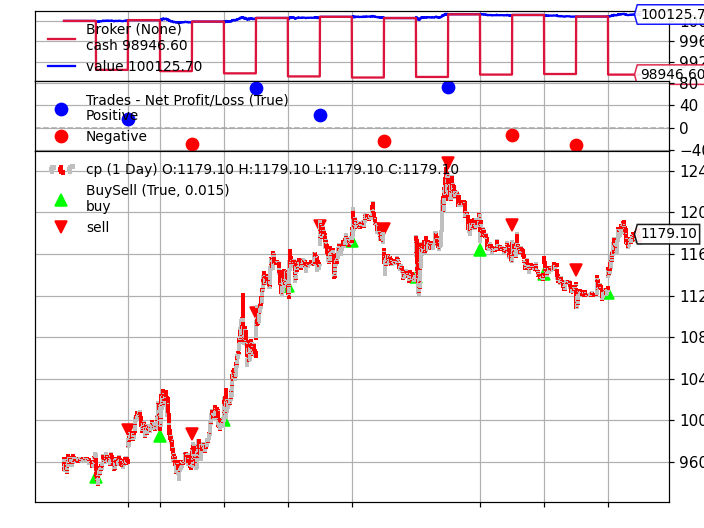

[[<Figure size 640x480 with 3 Axes>]]

In [80]:
cerebro.plot()


In [81]:
import backtrader as bt

In [83]:
tframes = dict(daily=bt.TimeFrame.Days, weekly=bt.TimeFrame.Weeks,
               monthly=bt.TimeFrame.Months)

    # Handy dictionary for the argument timeframe conversion
    # Resample the data
if args.noresample:
    datapath = args.dataname2 or '../../datas/2006-week-001.txt'
    data2 = btfeeds.BacktraderCSVData(dataname=datapath)
    # And then the large timeframe
    cerebro.adddata(data2)
else:
    cerebro.resampledata(data, timeframe=tframes[args.timeframe],
                         compression=args.compression)

# Run over everything
cerebro.run()

NameError: name 'args' is not defined

In [90]:
cerebro.resampledata(data1, timeframe=tframes['daily'],
        compression=1)

In [91]:
cerebro.run()

ValueError: time data '2020-04-01 09:20:00' does not match format '%d-%m-%Y %H:%M:%S'